In [4]:
import numpy as np
import pandas as pd 
from statsmodels import regression
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas_datareader as web

In [5]:
start = '2016-01-01'
end = '2017-01-01'

In [11]:
data = web.DataReader('AAPL','yahoo',start,end)

In [12]:
asset=data['Adj Close']

In [14]:
benchmark = web.DataReader('SPY','yahoo',start,end)


In [16]:
bnchmrk = benchmark['Adj Close']

In [17]:
asset_ret = asset.pct_change(1)[1:]

In [18]:
bnchmrk_ret = bnchmrk.pct_change(1)[1:]

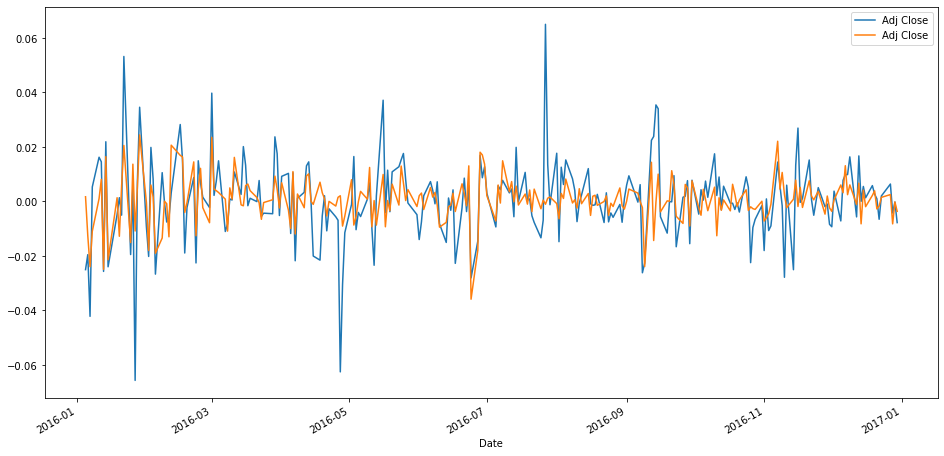

In [21]:
asset_ret.plot(figsize=(16,8))
bnchmrk_ret.plot()
plt.legend()

Text(0, 0.5, 'AAPL RET')

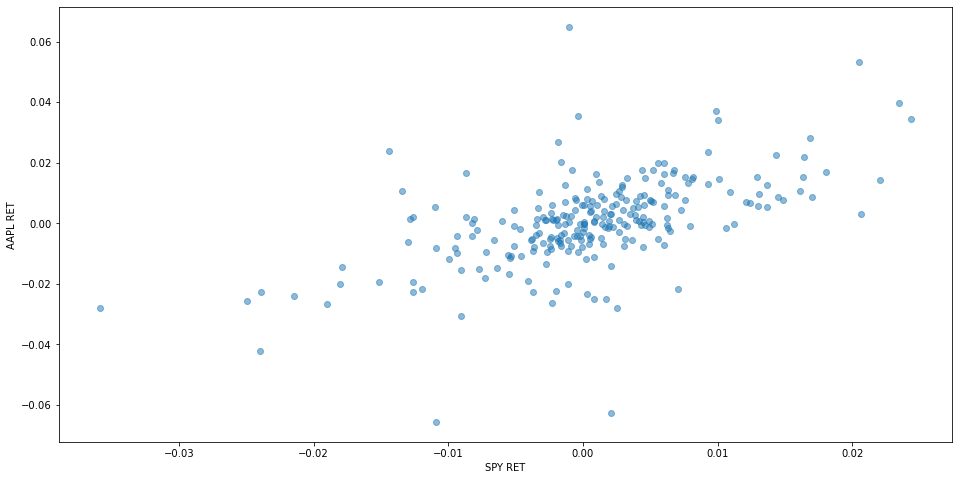

In [32]:
plt.figure(figsize=(16,8))
plt.scatter(bnchmrk_ret,asset_ret,alpha=0.50)
plt.xlabel('SPY RET')
plt.ylabel('AAPL RET')

In [69]:
AAPL = asset_ret.values
SPY = bnchmrk_ret.values

In [70]:
spy_constant = sm.add_constant(SPY)

In [71]:
model = regression.linear_model.OLS(AAPL,spy_constant).fit()
model.params

array([1.96350284e-05, 1.02360032e+00])

In [72]:
alpha,beta = model.params

In [73]:
alpha,beta

(1.963502838912704e-05, 1.0236003202184094)

In [74]:
spy_constant

array([[ 1.00000000e+00,  1.69129773e-03],
       [ 1.00000000e+00, -1.26141810e-02],
       [ 1.00000000e+00, -2.39914733e-02],
       [ 1.00000000e+00, -1.09766589e-02],
       [ 1.00000000e+00,  9.89821218e-04],
       [ 1.00000000e+00,  8.06833242e-03],
       [ 1.00000000e+00, -2.49405804e-02],
       [ 1.00000000e+00,  1.64166898e-02],
       [ 1.00000000e+00, -2.14659117e-02],
       [ 1.00000000e+00,  1.33117362e-03],
       [ 1.00000000e+00, -1.28152304e-02],
       [ 1.00000000e+00,  5.60201045e-03],
       [ 1.00000000e+00,  2.05154511e-02],
       [ 1.00000000e+00, -1.51163970e-02],
       [ 1.00000000e+00,  1.36430509e-02],
       [ 1.00000000e+00, -1.08832621e-02],
       [ 1.00000000e+00,  5.20910384e-03],
       [ 1.00000000e+00,  2.43771027e-02],
       [ 1.00000000e+00, -3.61273385e-04],
       [ 1.00000000e+00, -1.80221739e-02],
       [ 1.00000000e+00,  5.99478716e-03],
       [ 1.00000000e+00,  1.56849685e-03],
       [ 1.00000000e+00, -1.90504078e-02],
       [ 1.

Text(0.5, 0, 'AAPL Ret')

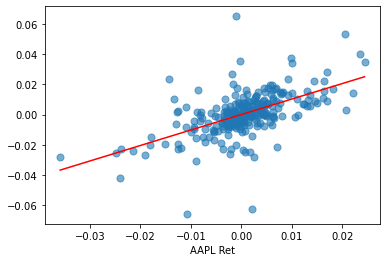

In [75]:
min_spy = bnchmrk_ret.values.min()
max_spy = bnchmrk_ret.values.max()
spy_line=np.linspace(min_spy,max_spy,100)
y = spy_line*beta + alpha
plt.scatter(bnchmrk_ret,asset_ret,alpha=0.6,s=50)
plt.plot(spy_line,y,c='r')
plt.xlabel('SPY Ret')
plt.xlabel('AAPL Ret')


In [76]:
hedged = -1*(beta*bnchmrk_ret) + asset_ret

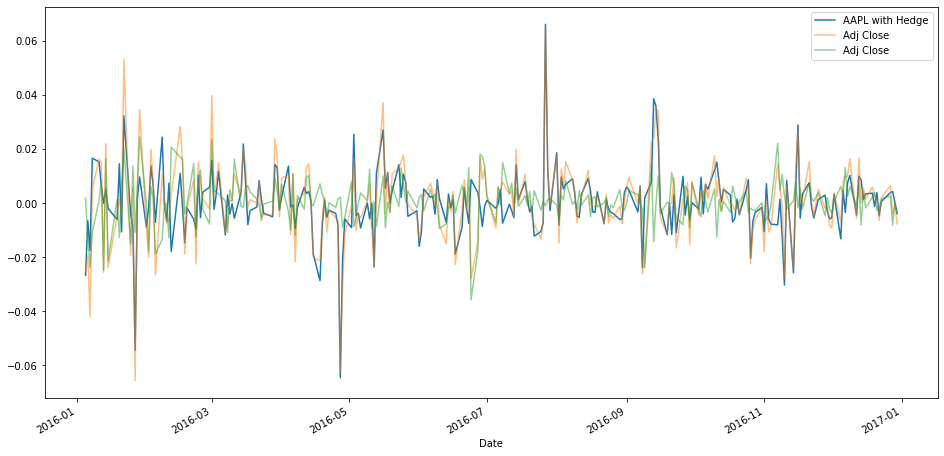

In [77]:
hedged.plot(label='AAPL with Hedge',figsize=(16,8))
asset_ret.plot(alpha=0.5)
bnchmrk_ret.plot(alpha=0.5)
plt.legend()

In [85]:
def alpha_beta(benchmark_ret,stock):
    benchmark = sm.add_constant(benchmark_ret)
    
    model = regression.linear_model.OLS(stock,benchmark).fit()
    return model.params[0],model.params[1]

In [86]:
benchmark2016 = web.DataReader('SPY','yahoo',start,end)
asset2016 = web.DataReader('AAPL','yahoo',start,end)

asset2016 = asset2016['Adj Close']
benchmark2016 = benchmark2016['Adj Close']
asset_ret2016 = asset2016.pct_change(1)[1:]
benchmark_ret2016 = benchmark2016.pct_change(1)[1:]

aret_values = asset_ret2016.values
bret_values = benchmark_ret2016.values



In [87]:
alpha2016,beta2016 = alpha_beta(bret_values,aret_values)
print("2016 Values")
print('Alpha:' +str(alpha2016))
print('Beta'+str(beta2016))

2016 Values
Alpha:1.963650117302101e-05
Beta1.0235955562095285


In [97]:
portfolio = (-1*(beta2016*benchmark_ret2016)) + asset_ret2016

In [98]:
alpha,beta = alpha_beta(benchmark_ret2016,portfolio)

In [99]:
print('Portfolio: alpha & beta')
print('alpha'+str(alpha))
print('beta' + str(beta))

Portfolio: alpha & beta
alpha1.9636501173021337e-05
beta-4.163336342344337e-17


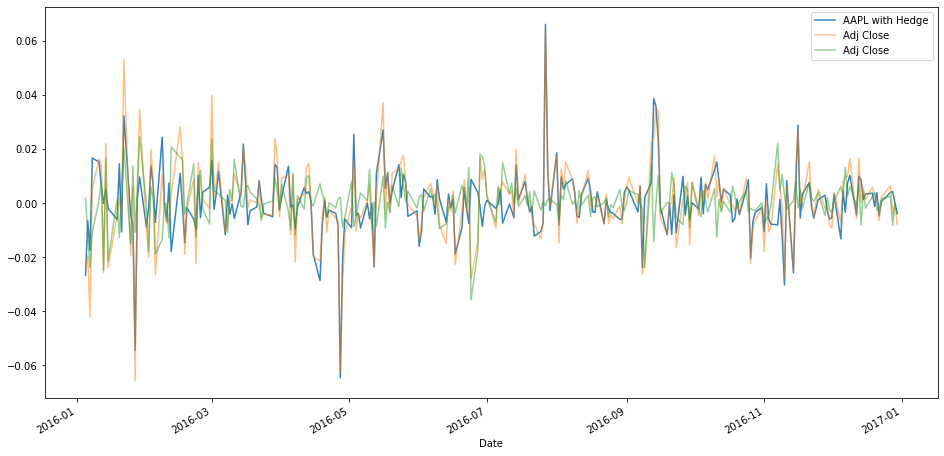

In [105]:

portfolio.plot(alpha=0.9,label='AAPL with Hedge',figsize=(16,8))
asset_ret2016.plot(alpha=0.5)
benchmark_ret2016.plot(alpha=0.5)
plt.legend()

In [106]:
portfolio.mean()

1.96365011730213e-05

In [107]:
asset_ret2016.mean()

0.000573547089911881

In [108]:
portfolio.std()

0.012110837675680532

In [109]:
asset_ret2016.std()

0.01473111450739106